In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data

In [149]:
movie_links_data = pd.read_csv("Data/links.csv")
movies_data = pd.read_csv("Data/movies.csv")
movie_rating_data = pd.read_csv("Data/ratings.csv")
movie_tags_data = pd.read_csv("Data/tags.csv")

In [150]:
all_data = [movie_links_data, movies_data, movie_rating_data, movie_tags_data]

In [151]:
print(movie_links_data.head())
print("Movies Link"+"-"*100)
print(movie_rating_data.head())
print("Movies Rating"+"-"*100)
print(movies_data.head())
print("Movies"+"-"*100)
print(movie_tags_data.head())
print("Movies Tags"+"-"*100)

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0
Movies Link----------------------------------------------------------------------------------------------------
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
Movies Rating----------------------------------------------------------------------------------------------------
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Child

In [175]:
print("-"*50,"Movies Link"+"-"*50)
print(movie_links_data.info())
print("-"*50,"Movies Rating"+"-"*50)
print(movie_rating_data.info())
print("-"*50,"Movies"+"-"*50)
print(movies_data.info())
print("-"*50,"Movies Tags"+"-"*50)
print(movie_tags_data.info())

-------------------------------------------------- Movies Link--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None
-------------------------------------------------- Movies Rating--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
--------

# Data Analysis

In [153]:
# Shapes
print("-"*50+"Shape of Movies Link Dataset"+"-"*50)
print(movie_links_data.shape)
print("-"*50+"Shape of Movies Rating Dataset"+"-"*50)
print(movie_rating_data.shape)
print("-"*50+"Shape of Movies Dataset"+"-"*50)
print(movies_data.shape)
print("-"*50+"Shape of Movies Tags Dataset"+"-"*50)
print(movie_tags_data.shape)


--------------------------------------------------Shape of Movies Link Dataset--------------------------------------------------
(9742, 3)
--------------------------------------------------Shape of Movies Rating Dataset--------------------------------------------------
(100836, 4)
--------------------------------------------------Shape of Movies Dataset--------------------------------------------------
(9742, 3)
--------------------------------------------------Shape of Movies Tags Dataset--------------------------------------------------
(3683, 4)


In [154]:
# Uniques in ratings.csv
print("Uniques userId in ratings.csv -- ", movie_rating_data['userId'].nunique())

Uniques userId in ratings.csv --  610


In [155]:
print(movies_data.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [156]:
print(movie_rating_data.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


### Movie has recieved maximum number of user ratings

In [157]:
# Merging movies.csv and ratings.csv dataset
merged_movie_rating = pd.merge(movies_data, movie_rating_data, on="movieId", how='inner')
print("-"*50+"Merged DataSet"+"-"*50)
print(merged_movie_rating.columns)

--------------------------------------------------Merged DataSet--------------------------------------------------
Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')


In [158]:
check_movie = ["Matrix",
    "Pulp Fiction",
    "Forrest Gump",
    "Shawshank Redemption",
    ]
max_number_rating = []

In [159]:
for i in check_movie:
    number_movie = merged_movie_rating['title'].apply(lambda x: i in x)
    movie_rate_df = merged_movie_rating[number_movie==True]
    movie_rate_df = movie_rate_df[movie_rate_df['rating']!=np.nan].shape[0]
    print("-"*50 , f"{i}" , "-"*50)
    print(movie_rate_df)
    max_number_rating.append(movie_rate_df)
    

-------------------------------------------------- Matrix --------------------------------------------------
453
-------------------------------------------------- Pulp Fiction --------------------------------------------------
307
-------------------------------------------------- Forrest Gump --------------------------------------------------
329
-------------------------------------------------- Shawshank Redemption --------------------------------------------------
317


In [160]:
max_number_index = max_number_rating.index(max(max_number_rating))
print("-"*50 , "Maximum Number of Rated Movie" , "-"*50)
print(f"{check_movie[max_number_index]}")

-------------------------------------------------- Maximum Number of Rated Movie --------------------------------------------------
Matrix


### Select all the correct tags submitted by users to "Matrix, The (1999)" movie

In [161]:
movie_tag = "Matrix, The (1999)"

In [162]:
# Finding Primary Key
print("-"*50 , "movies.csv" , "-"*50)
print(movies_data.columns)
print("-"*50 , "tags.csv" , "-"*50)
print(movie_tags_data.columns)

-------------------------------------------------- movies.csv --------------------------------------------------
Index(['movieId', 'title', 'genres'], dtype='object')
-------------------------------------------------- tags.csv --------------------------------------------------
Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


In [163]:
# Merge movies.csv and tags.csv DataSet
merged_data_tags = pd.merge(movies_data, movie_tags_data, on="movieId", how='inner')

In [164]:
tags_of_movie = merged_data_tags[merged_data_tags["title"] == movie_tag].tag.values
print("-"*50 , "Tags of Matrix, The (1999)" , "-"*50)
print(tags_of_movie)

-------------------------------------------------- Tags of Matrix, The (1999) --------------------------------------------------
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


### Average user rating for movie named "Terminator 2: Judgment Day (1991)"

In [165]:
avg_rating_movie = "Terminator 2: Judgment Day (1991)"

In [166]:
avg_rating = np.mean(merged_movie_rating[merged_movie_rating['title'] == avg_rating_movie].rating)
print("-"*39 , "Average Rating of Terminator 2: Judgment Day (1991)" , "-"*39)
print(avg_rating)

--------------------------------------- Average Rating of Terminator 2: Judgment Day (1991) ---------------------------------------
3.970982142857143


### Data distribution of user ratings for "Fight Club (1999)" Movie

In [167]:
rating_dist_movie = "Fight Club (1999)"

In [168]:
movie_ratings = merged_movie_rating[merged_movie_rating['title'] == rating_dist_movie].rating.values
print("-"*50 , f"Rating of {rating_dist_movie}" , "-"*50)
print(movie_ratings)

-------------------------------------------------- Rating of Fight Club (1999) --------------------------------------------------
[5.  2.  0.5 2.5 3.5 4.5 4.5 5.  2.  3.5 3.5 4.  4.  3.  5.  2.  3.  4.5
 5.  5.  4.5 4.5 5.  4.5 2.5 4.5 5.  3.5 4.5 5.  5.  5.  4.5 5.  5.  4.5
 5.  4.  4.  5.  3.  5.  4.  5.  0.5 4.  5.  3.  4.5 4.5 4.  4.5 4.5 5.
 3.  4.  4.  3.  5.  5.  5.  5.  4.5 5.  4.5 4.5 4.5 1.5 5.  3.5 4.  5.
 3.  4.5 4.  5.  3.  4.  5.  5.  5.  5.  5.  4.  5.  5.  5.  3.5 4.5 5.
 4.  3.5 3.  2.  4.5 5.  5.  4.5 4.5 4.  0.5 5.  5.  4.  4.  4.  5.  4.
 4.  4.5 3.5 4.5 4.5 4.  4.  5.  3.5 5.  4.  5.  4.5 5.  4.5 4.5 4.5 4.5
 4.5 3.5 4.  5.  5.  4.  4.5 5.  4.  5.  3.  5.  4.  5.  5.  5.  5.  4.
 5.  5.  5.  4.  4.  4.5 4.5 4.  3.5 4.  5.  5.  3.5 4.5 4.  5.  4.  4.5
 5.  5.  4.5 3.5 5.  4.  4.  4.  4.  4.5 4.5 5.  4.  4.5 3.5 5.  4.  3.5
 5.  5.  2.5 5.  4.  4.5 3.5 4.  5.  5.  4.5 5.  5.  5.  4.5 4.5 5.  4.
 4.5 4.  4.5 4.  5.  5.  4.5 4.  5.  3.5 2.  4.  4.  5.  4.5 5.  4.  5.
 

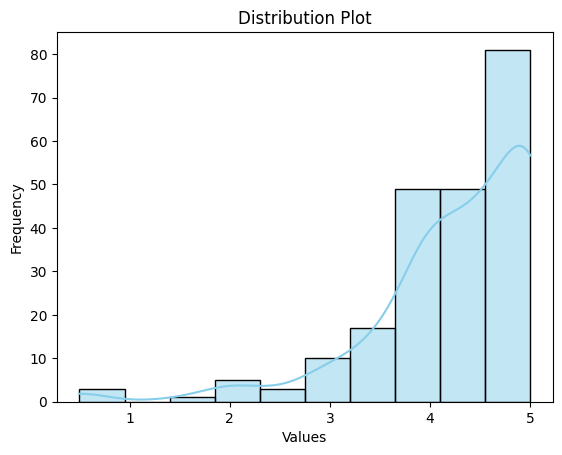

In [169]:
# Plotting Dsitribution of the User Rating
sns.histplot(movie_ratings, kde=True, bins=10, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution Plot')
plt.show()

### Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings

In [170]:
merged_movie_rating.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [171]:
unique_movies = merged_movie_rating['title'].unique()

In [207]:
len(unique_movies)

9719

In [184]:
merged_movie_rating[merged_movie_rating['title'] == unique_movies[0]]

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
210,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,606,2.5,1349082950
211,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,607,4.0,964744033
212,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,608,2.5,1117408267
213,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,609,3.0,847221025


In [212]:
def check_number_rating(new_df, unique_movies, merged_movie_rating):
    for movie in unique_movies:
        if merged_movie_rating[merged_movie_rating['title'] == movie].shape[0] > 50:
            old_df = merged_movie_rating[merged_movie_rating['title'] == movie]
            new_df = pd.concat([old_df, new_df], ignore_index=True)
        else:
            pass
    return new_df

In [213]:
new_movie_data = pd.DataFrame()

In [214]:
new_movie_data = check_number_rating(new_movie_data, unique_movies, merged_movie_rating)

In [215]:
# Conformation
new_movie_data['title'].value_counts()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
                                   ... 
Bad Boys (1995)                      51
Splash (1984)                        51
Mulholland Drive (2001)              51
The Devil's Advocate (1997)          51
Army of Darkness (1993)              51
Name: count, Length: 437, dtype: int64